## Elastic Net Regression Animation

Elastic Net combines:

L1 (Lasso) → sparsity

L2 (Ridge) → smoothness

This animation shows how the model changes as α increases, while keeping the L1/L2 mixture fixed.

✔ Smooth regression curve updates

✔ α increases gradually (stronger regularization)

✔ GIF saved automatically

✔ Works on all Matplotlib versions

c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.984e+05, tolerance: 6.112e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.984e+05, tolerance: 6.112e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

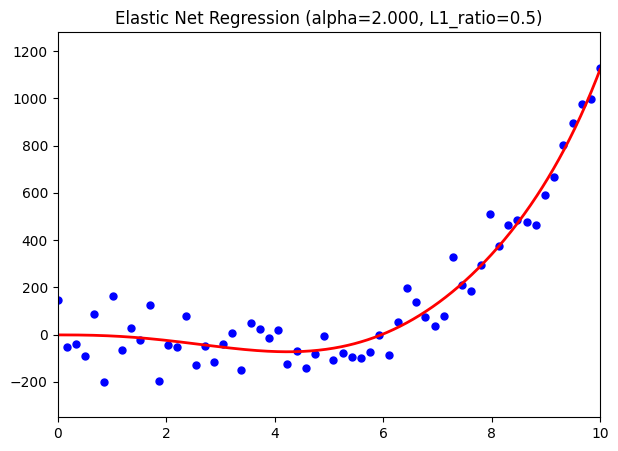

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

# Create folder for all GIFs
os.makedirs("gifs", exist_ok=True)

# Generate nonlinear sample data
np.random.seed(1)
X = np.linspace(0, 10, 60)
y = 3 * X**3 - 22 * X**2 + 25 * X + np.random.randn(60) * 90
X = X.reshape(-1, 1)

# Polynomial degree
degree = 8
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Alpha values (regularization strength)
alphas = np.linspace(0.001, 2.0, 40)

# Mixing parameter (L1_ratio): 0 = ridge, 1 = lasso
l1_ratio = 0.5   # Equal mix of L1 + L2

# Plot setup
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X, y, color='blue', s=25)
line, = ax.plot([], [], color='red', linewidth=2)

def update(i):
    alpha = alphas[i]

    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=50000)
    model.fit(X_poly, y)

    # Smooth evaluation grid
    X_grid = np.linspace(0, 10, 500).reshape(-1, 1)
    X_grid_poly = poly.transform(X_grid)
    y_pred = model.predict(X_grid_poly)

    line.set_data(X_grid, y_pred)

    ax.set_title(f"Elastic Net Regression (alpha={alpha:.3f}, L1_ratio={l1_ratio})")
    ax.set_xlim(0, 10)
    ax.set_ylim(min(y)-150, max(y)+150)

    return line,

ani = FuncAnimation(fig, update, frames=len(alphas), interval=200)

# Save GIF before showing
ani.save("gifs/elastic_net_regression.gif", writer="pillow")

plt.show()
